<a href="https://colab.research.google.com/github/yugawala/shakyo/blob/main/%E3%82%B9%E3%83%A9%E3%82%B9%E3%83%A9%E3%82%8F%E3%81%8B%E3%82%8B%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E8%AB%96%E5%86%99%E7%B5%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1章

In [25]:
import pymc as pm
import arviz as az

import pandas as pd

import japanize_matplotlib

In [6]:
pm.__version__

'5.13.1'

In [7]:
model = pm.Model()

with model:
  x = pm.Binomial('x', p=0.5, n=5)

In [8]:
with model:
  prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [9]:
prior_samples

Inference data with groups:
	> prior

In [10]:
x_samples = prior_samples["prior"]["x"].values
print(type(x_samples))
print(x_samples.shape)
print(x_samples)

<class 'numpy.ndarray'>
(1, 500)
[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3

In [11]:
x_samples_pd = pd.DataFrame(
    x_samples.reshape(-1)
)
display(x_samples_pd)
value_counts = x_samples_pd.value_counts().sort_index()

,0
0,4
1,4
2,4
3,2
4,4
...,...
495,2
496,3
497,2
498,2


In [13]:
print(value_counts)

0
0     13
1     79
2    152
3    159
4     84
5     13
Name: count, dtype: int64


<Axes: xlabel='0'>

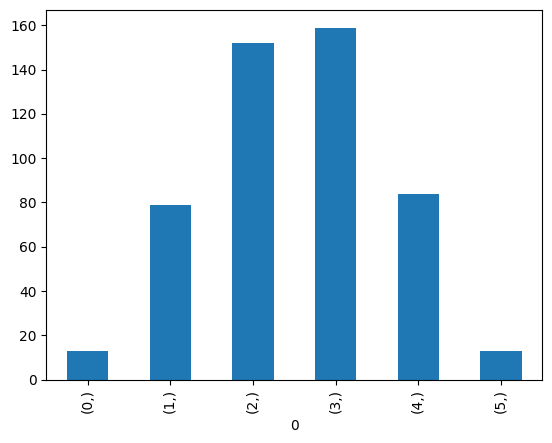

In [14]:
# value_countsのヒストグラム
value_counts.plot(kind='bar')

In [16]:
summary = az.summary(prior_samples, kind='stats')
summary

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


Text(0.5, 1.0, 'Arvizによる事前分布の可視化')

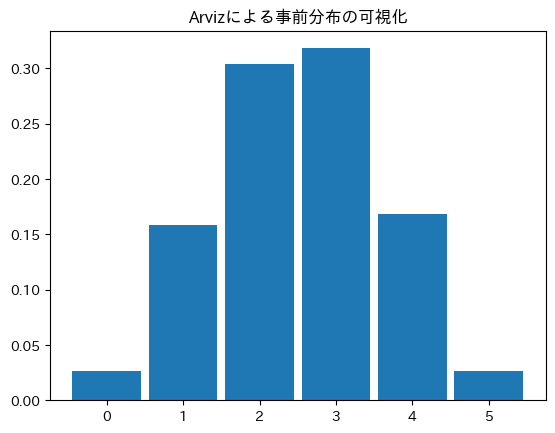

In [24]:
ax = az.plot_dist(x_samples)
ax.set_title('Arvizによる事前分布の可視化')